# 5 Essential Concepts for Data Scientists
This notebook contains the code used in my medium article: <PLACEHOLDER LINK>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Concept 2: Regularisation

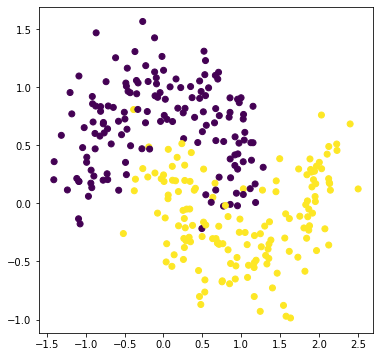

In [112]:
# Generating Toy Dataset
data,y = make_moons(300,noise=0.24)

fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(data[:,0],data[:,1],c=y)

# Creating a meshgrid to get all points in the range for plotting decision boundary
x_range = [data[:,0].min()-0.2, data[:,0].max()+0.2]
y_range = [data[:,1].min()-0.2, data[:,1].max()+0.2]
xx,yy = np.meshgrid(np.arange(*x_range,step=0.1),np.arange(*y_range,step=0.1))
# Reshape meshgrid points to array of shape (n_samples, n_features) for 
# sklearn decision function
xy_ravel = np.stack([xx.ravel(),yy.ravel()],axis=1)

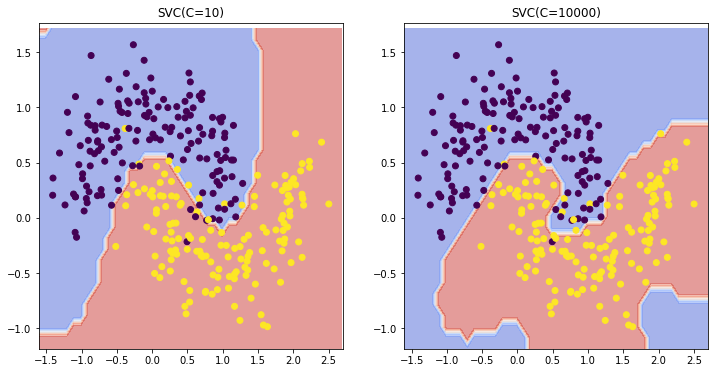

In [119]:
models = [
    SVC(C=10),
    SVC(C=10000)
]

fig,axs =plt.subplots(1,len(models),figsize=(12,6))
for i,m in enumerate(models):
    # print(m)
    m.fit(data,y)
    # Applying Decision function too all points in the grid
    dec = m.decision_function(xy_ravel)
    # Changing decision function values to [-1,0,+1]
    dec = np.sign(dec)
    # Reshape dec array from (n_samples, n_features) to original meshgrid for contour plot
    dec = dec.reshape(xx.shape)
    axs[i].contourf(xx,yy,dec,cmap="coolwarm",alpha=0.5)
    axs[i].scatter(data[:,0],data[:,1],c=y)
    axs[i].set_xlim(x_range)
    axs[i].set_ylim(y_range)
    axs[i].set_title(str(m))

## Concept 4: Curse of Dimensionality